<a href="https://colab.research.google.com/github/LilySu/DS-Unit-2-Sprint-4-Practicing-Understanding/blob/master/DS_Unit_2_Sprint_Challenge_4_Practicing_Understanding_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
pip install pdpbox

     |████████████████████████████████| 57.7MB 1.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [271]:
pip install shap

     |████████████████████████████████| 235kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/93/3f/4a/331cf71b5043416aeba0df795e7c204c7ad277673f1938d11b
Successfully built shap


In [39]:
pip install eli5

In [40]:
pip install category_encoders

In [0]:
import pandas as pd
import seaborn as sns
import warnings
import category_encoders as ce
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [0]:
train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

In [99]:
train.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Violations', 'Latitude', 'Longitude', 'Location',
       'Fail'],
      dtype='object')

In [0]:
train['Year'] = pd.DatetimeIndex(train['Inspection Date']).year
train['Month'] = pd.DatetimeIndex(train['Inspection Date']).month
train['Day'] = pd.DatetimeIndex(train['Inspection Date']).day
train['Facility Type'] = train['Facility Type'].str.upper()

In [0]:
train = train.fillna('unknown')

In [105]:
train['Fail'].value_counts(normalize = True)#Get Baselines, 25% failure rat

0    0.74139
1    0.25861
Name: Fail, dtype: float64

In [0]:
X = train.drop(columns = ['DBA Name','License #', 'AKA Name', 
       'Address', 'State', 'Zip','Latitude', 'Longitude','Violations','Location','Inspection Date', 'Fail'])
y = train['Fail']

In [0]:
trainfacility = train.groupby('Facility Type')['Inspection ID'].nunique()
facsorted = trainfacility.sort_values(ascending = False)
fac = facsorted

In [173]:
fac.index

Index(['RESTAURANT', 'GROCERY STORE', 'SCHOOL', 'BAKERY',
       'DAYCARE (2 - 6 YEARS)', 'CHILDREN'S SERVICES FACILITY',
       'DAYCARE ABOVE AND UNDER 2 YEARS', 'LONG TERM CARE', 'CATERING',
       'MOBILE FOOD DISPENSER',
       ...
       'GIFT/CARD SHOP WITH CANDY', 'GROCERY/DRUG STORE',
       'GROCERY/ RESTAURANT', 'GROCERY STORE/DELI',
       'GROCERY STORE/ RESTAURANT', 'SOUP KITCHEN', 'TOBACCO STORE',
       'GOLF COURSE CONNCESSION STAND', 'GOLF COURSE', '(CONVENIENCE STORE)'],
      dtype='object', name='Facility Type', length=303)

In [0]:
s1 = fac.index
s2 = fac.values
new = pd.DataFrame(dict(s1 = s1, s2 = s2)).reset_index()

In [0]:
facdict = pd.Series(new.s2.values,index=new.s1).to_dict()

In [182]:
X['FacCount'] = X['Facility Type'].map(facdict)
X.head(3)

,Inspection ID,Facility Type,Risk,City,Inspection Type,Year,Month,Day,FacCount
0,2088270,RESTAURANT,Risk 1 (High),CHICAGO,Canvass,2017,9,15,34264
1,555268,GROCERY STORE,Risk 3 (Low),CHICAGO,Complaint Re-Inspection,2011,10,20,6904
2,1751394,RESTAURANT,Risk 1 (High),CHICAGO,Canvass Re-Inspection,2016,4,5,34264


In [185]:
# for ind, val in facsorted.iteritems():
#   print(val)#To print just index or just values in a 2 column pandas series in the future
X['Risk'].unique()

array(['Risk 1 (High)', 'Risk 3 (Low)', 'Risk 2 (Medium)', 'unknown'],
      dtype=object)

In [0]:
risktype = ['Risk 1 (High)', 'Risk 3 (Low)', 'Risk 2 (Medium)', 'unknown']
for i, risk in enumerate(risktype):
  X[risk] = (X.Risk == risk).astype(float)

In [198]:
X.head(3)

,Inspection ID,Facility Type,Risk,City,Inspection Type,Year,Month,Day,FacCount,Risk 1 (High),Risk 3 (Low),Risk 2 (Medium),unknown
0,2088270,RESTAURANT,Risk 1 (High),CHICAGO,Canvass,2017,9,15,34264,1.0,0.0,0.0,0.0
1,555268,GROCERY STORE,Risk 3 (Low),CHICAGO,Complaint Re-Inspection,2011,10,20,6904,0.0,1.0,0.0,0.0
2,1751394,RESTAURANT,Risk 1 (High),CHICAGO,Canvass Re-Inspection,2016,4,5,34264,1.0,0.0,0.0,0.0


In [202]:
IType = train.groupby('Inspection Type')['Inspection ID'].nunique()
Isorted = IType.sort_values(ascending = False)
Isorted

Inspection Type
Canvass                                   24170
License                                    7825
Canvass Re-Inspection                      6346
Complaint                                  4948
License Re-Inspection                      3002
Complaint Re-Inspection                    2241
Short Form Complaint                       2103
License-Task Force                          214
Suspected Food Poisoning                    207
Consultation                                189
Tag Removal                                 146
Out of Business                             109
Task Force Liquor 1475                       92
Recent Inspection                            66
Suspected Food Poisoning Re-inspection       58
Complaint-Fire                               51
Short Form Fire-Complaint                    36
Special Events (Festivals)                   21
No Entry                                     21
Package Liquor 1474                          16
Complaint-Fire Re-inspec

In [0]:
s3 = Isorted.index
s4 = Isorted.values
new = pd.DataFrame(dict(s3 = s3, s4 = s4)).reset_index()

In [204]:
Idict = pd.Series(new.s4.values,index=new.s3).to_dict()
X['ICount'] = X['Inspection Type'].map(Idict)
X.head(3)

,Inspection ID,Facility Type,Risk,City,Inspection Type,Year,Month,Day,FacCount,Risk 1 (High),Risk 3 (Low),Risk 2 (Medium),unknown,ICount
0,2088270,RESTAURANT,Risk 1 (High),CHICAGO,Canvass,2017,9,15,34264,1.0,0.0,0.0,0.0,24170
1,555268,GROCERY STORE,Risk 3 (Low),CHICAGO,Complaint Re-Inspection,2011,10,20,6904,0.0,1.0,0.0,0.0,2241
2,1751394,RESTAURANT,Risk 1 (High),CHICAGO,Canvass Re-Inspection,2016,4,5,34264,1.0,0.0,0.0,0.0,6346


In [207]:
# Split Train, Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Make pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=100)
)

# Cross-validate with training data
scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=3, 
                         n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.4s finished


In [208]:
print('Cross-Validation ROC AUC scores:', scores)
print('Average:', scores.mean())

Cross-Validation ROC AUC scores: [0.68242857 0.68664223 0.68275002]
Average: 0.6839402692407633


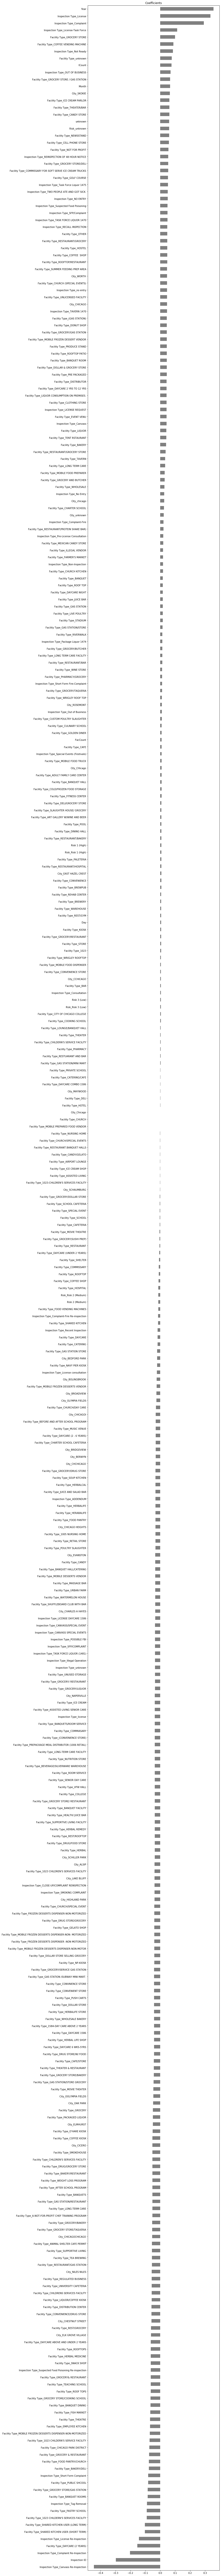

In [209]:
%matplotlib inline
import matplotlib.pyplot as plt


pipeline.fit(X_train, y_train)

# Visualize coefficients
plt.figure(figsize=(10,200))
plt.title('Coefficients')
coefficients = pipeline.named_steps['logisticregression'].coef_[0]
feature_names = pipeline.named_steps['onehotencoder'].transform(X_train).columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color='gray');

In [230]:
X =  X.select_dtypes(include='number')
X = X.drop(columns = ['Inspection ID'])
X.head(2)

,Year,Month,Day,FacCount,Risk 1 (High),Risk 3 (Low),Risk 2 (Medium),unknown,ICount
0,2017,9,15,34264,1.0,0.0,0.0,0.0,24170
1,2011,10,20,6904,0.0,1.0,0.0,0.0,2241


In [231]:
from sklearn.model_selection import train_test_split

def train_validation_test_split(
    X, y, train_size=0.4, val_size=0.4, test_size=0.2, 
    random_state=None, shuffle=True):
        
    assert train_size + val_size + test_size == 1
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.4, val_size=0.4, test_size=0.2, random_state=1)
X_train

,Year,Month,Day,FacCount,Risk 1 (High),Risk 3 (Low),Risk 2 (Medium),unknown,ICount
39938,2016,5,3,34264,1.0,0.0,0.0,0.0,6346
3231,2018,11,30,34264,1.0,0.0,0.0,0.0,24170
18309,2019,2,20,103,0.0,1.0,0.0,0.0,4948
33688,2011,4,21,34264,1.0,0.0,0.0,0.0,214
47609,2019,1,29,3880,1.0,0.0,0.0,0.0,24170
18019,2018,7,16,34264,0.0,0.0,1.0,0.0,2103
45753,2014,9,4,6904,1.0,0.0,0.0,0.0,6346
18425,2011,2,16,34264,1.0,0.0,0.0,0.0,3002
22273,2010,11,10,34264,1.0,0.0,0.0,0.0,24170
1635,2017,6,7,34264,1.0,0.0,0.0,0.0,6346


In [0]:
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_val)

In [233]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.7430415101608399

In [234]:
X_train_numeric = X_train.select_dtypes('number')
X_val_numeric   = X_val.select_dtypes('number')

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train_numeric, y_train)
y_pred_proba = tree.predict_proba(X_val_numeric)[:,1]
roc_auc_score(y_val, y_pred_proba)

0.6867679737577743

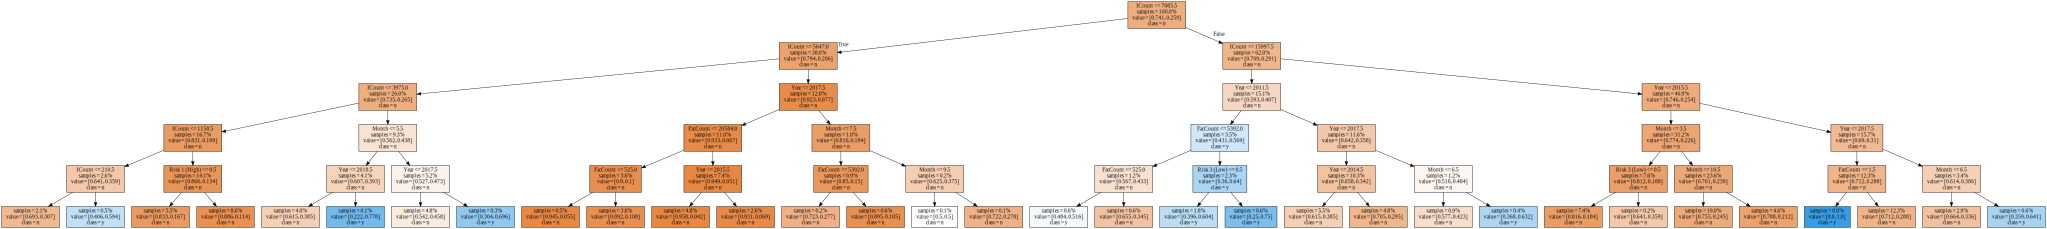

In [235]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file=None, feature_names=X_train_numeric.columns, class_names=['n', 'y'], filled=True, impurity=False, proportion=True)

graphviz.Source(dot_data)

In [236]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_numeric, y_train)
y_pred_proba = model.predict_proba(X_val_numeric)[:,1]
roc_auc_score(y_val, y_pred_proba)

0.5234144309893013

In [237]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_val_scaled   = scaler.transform(X_val_numeric)

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred_proba = model.predict_proba(X_val_scaled)[:,1]
roc_auc_score(y_val, y_pred_proba)

0.5354383364053553

In [238]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

pipeline.fit(X_train_numeric, y_train)
y_pred_proba = pipeline.predict_proba(X_val_numeric)[:,1]
roc_auc_score(y_val, y_pred_proba)

0.5354383364053553

In [239]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=100)
)

# Cross-validate with training data
scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=10, 
                         n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1610s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [240]:
print('Cross-Validation ROC AUC scores:', scores)
print('Average:', scores.mean())

Cross-Validation ROC AUC scores: [0.54860112 0.51841356 0.535768   0.54537518 0.52134751 0.55143791
 0.54984191 0.5201496  0.5212501  0.53349172]
Average: 0.5345676617006576


In [241]:
from sklearn.model_selection import cross_val_predict


pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=10)
)
y_pred_proba = cross_val_predict(pipeline, X_train, y_train, cv=3, n_jobs=-1, 
                                 method='predict_proba')[:,1]
y_pred_proba 

array([0.24023023, 0.26206083, 0.36009096, ..., 0.25595687, 0.23319179,
       0.23533228])

In [242]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error


param_distributions = {
     'n_estimators': [100, 200],
     'max_depth': [4, 5]
}

randomsearch = RandomizedSearchCV(# pipeline will work 
    RandomForestClassifier(n_jobs=-1, random_state=42),
    param_distributions=param_distributions,
    n_iter = 20,
    cv=3,
    scoring='roc_auc',
    verbose=10,
    return_train_score=True
)
# ordinal first, then categorical 
#regex for restaurant in every instance
#fits on encoder =, encoder.fit encoder.transform.
#drop rows that have one observation
#organize 1 for models, 1 for model exploration
#save dataframe as .to_csv
#start working on blog early use hemingway
#baseline!

randomsearch.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] n_estimators=100, max_depth=4 ...................................
[CV]  n_estimators=100, max_depth=4, score=(train=0.686, test=0.660), total=   0.6s
[CV] n_estimators=100, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=100, max_depth=4, score=(train=0.683, test=0.675), total=   0.6s
[CV] n_estimators=100, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=100, max_depth=4, score=(train=0.680, test=0.667), total=   0.6s
[CV] n_estimators=200, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=200, max_depth=4, score=(train=0.689, test=0.664), total=   1.1s
[CV] n_estimators=200, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s remaining:    0.0s


[CV]  n_estimators=200, max_depth=4, score=(train=0.687, test=0.679), total=   1.1s
[CV] n_estimators=200, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.7s remaining:    0.0s


[CV]  n_estimators=200, max_depth=4, score=(train=0.685, test=0.675), total=   1.2s
[CV] n_estimators=100, max_depth=5 ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.0s remaining:    0.0s


[CV]  n_estimators=100, max_depth=5, score=(train=0.702, test=0.671), total=   0.7s
[CV] n_estimators=100, max_depth=5 ...................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.8s remaining:    0.0s


[CV]  n_estimators=100, max_depth=5, score=(train=0.699, test=0.682), total=   0.7s
[CV] n_estimators=100, max_depth=5 ...................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.6s remaining:    0.0s


[CV]  n_estimators=100, max_depth=5, score=(train=0.696, test=0.679), total=   0.7s
[CV] n_estimators=200, max_depth=5 ...................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.3s remaining:    0.0s


[CV]  n_estimators=200, max_depth=5, score=(train=0.704, test=0.671), total=   1.3s
[CV] n_estimators=200, max_depth=5 ...................................
[CV]  n_estimators=200, max_depth=5, score=(train=0.701, test=0.684), total=   1.3s
[CV] n_estimators=200, max_depth=5 ...................................
[CV]  n_estimators=200, max_depth=5, score=(train=0.697, test=0.682), total=   1.3s


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   12.9s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=-1, 

In [243]:
randomsearch.best_score_

0.6787161298599801

In [245]:
import eli5
from eli5.sklearn import PermutationImportance

best = randomsearch.best_estimator_
permuter = PermutationImportance(best, scoring='roc_auc', cv='prefit', 
                                 n_iter=2, random_state=42)

permuter.fit(X_test.values, y_test)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=5,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=200,
                                                       n

In [246]:
feature_names = X_test.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.1433 ± 0.0016,ICount
0.0351 ± 0.0032,Year
0.0088 ± 0.0009,Month
0.0047 ± 0.0031,FacCount
0.0022 ± 0.0002,Risk 1 (High)
0.0016 ± 0.0003,Risk 2 (Medium)
0.0007 ± 0.0000,Day
0.0005 ± 0.0009,Risk 3 (Low)
0.0000 ± 0.0000,unknown


In [0]:
print('Shape before removing features:', X_train.shape)

In [248]:
mask = permuter.feature_importances_ > 0.0001
features = X_train.columns[mask]
X_train = X_train[features]
print('Shape after removing features:', X_train.shape)

Shape after removing features: (20766, 8)


In [253]:
from scipy.stats import randint
from xgboost import XGBClassifier


param_distributions = {
    'n_estimators': randint(150, 300), 
    'max_depth': randint(4,5)
}

# n_iter & cv parameters are low here so the example runs faster
search = RandomizedSearchCV(
    estimator=XGBClassifier(n_jobs=-1, random_state=42), 
    param_distributions=param_distributions, 
    n_iter=20, 
    scoring='roc_auc', 
    n_jobs=-1, 
    cv=3, 
    verbose=10, 
    return_train_score=True, 
    random_state=42
)

search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=42, reg_alpha=0,
                                           reg_lambda=1, sca...
                                           seed=None, silent=True,
                                           subsample=1),
                   iid='warn', n_iter=20, n_jobs=-1,
                   param_distributions={'max

In [262]:
X_train.shape, X_test.shape

((20766, 8), (10384, 9))

In [263]:
X_train.columns

Index(['Year', 'Month', 'Day', 'FacCount', 'Risk 1 (High)', 'Risk 3 (Low)',
       'Risk 2 (Medium)', 'ICount'],
      dtype='object')

In [0]:
X_test = X_test.drop(columns = ['unknown'])

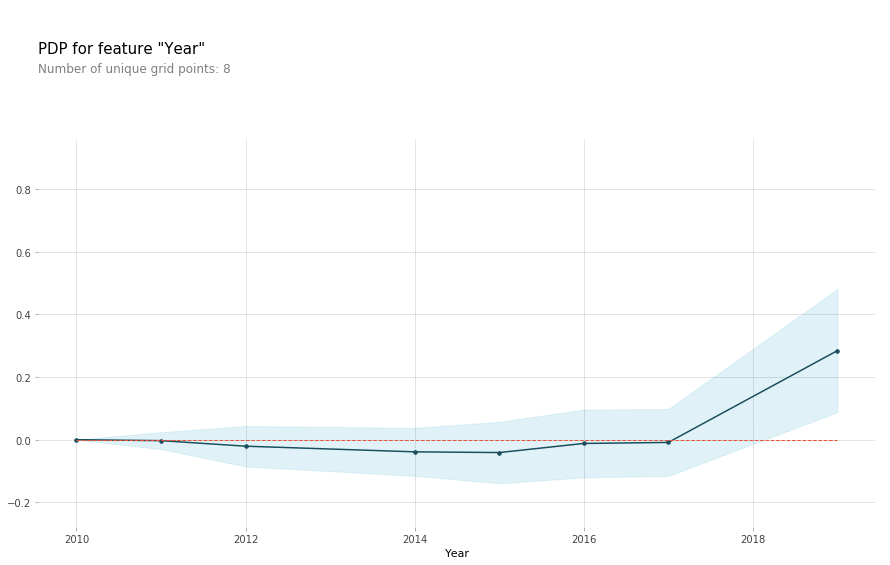

In [273]:
# from sklearn.metrics import roc_auc_score
# best = search.best_estimator_
# encoder = ce.OneHotEncoder(use_cat_names=True)
# X_train = encoder.fit_transform(X_train)
# X_test = encoder.transform(X_test)
# y_pred_proba = best.predict_proba(X_test.values)
# print('Test ROC AUC:', roc_auc_score(y_test, y_pred_proba))
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Year'

isolated = pdp_isolate(
    model=best, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

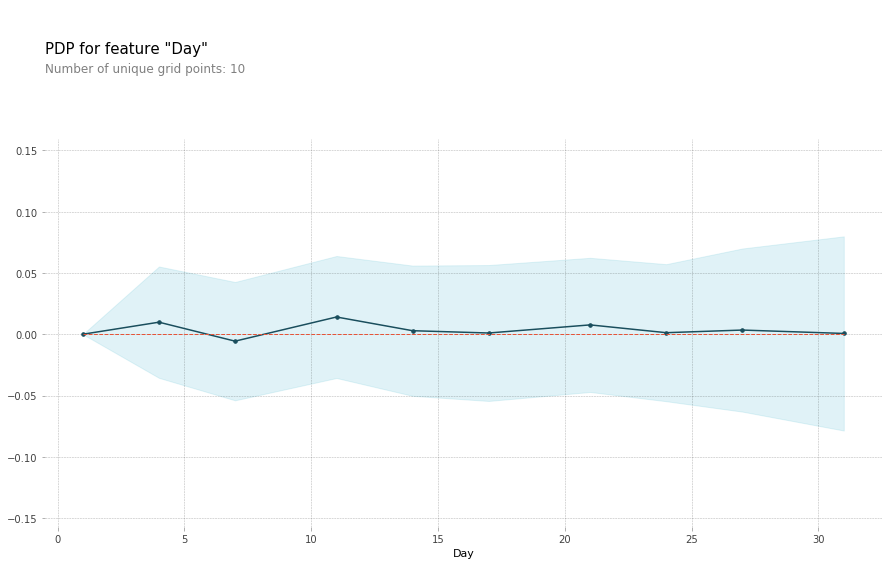

In [279]:
feature = 'Day'

isolated = pdp_isolate(
    model=best, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

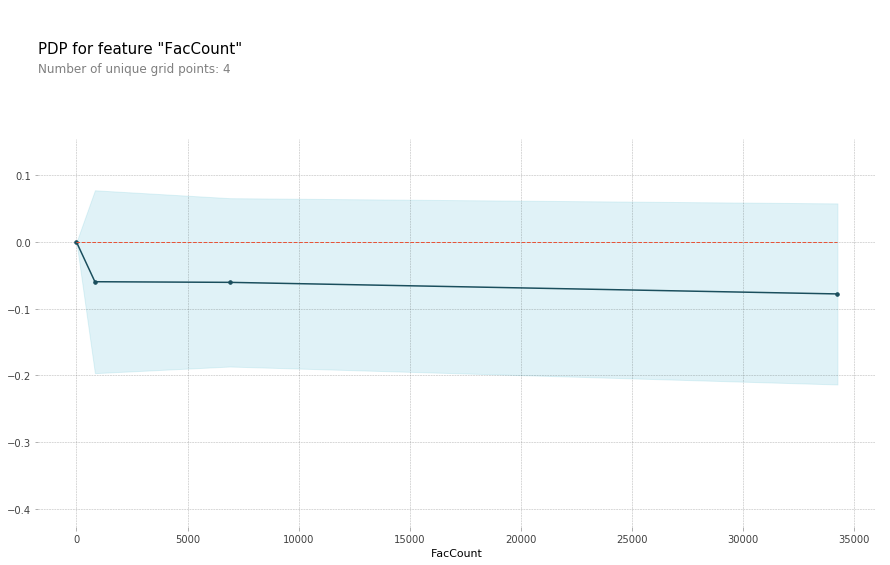

In [278]:
feature = 'FacCount'

isolated = pdp_isolate(
    model=best, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

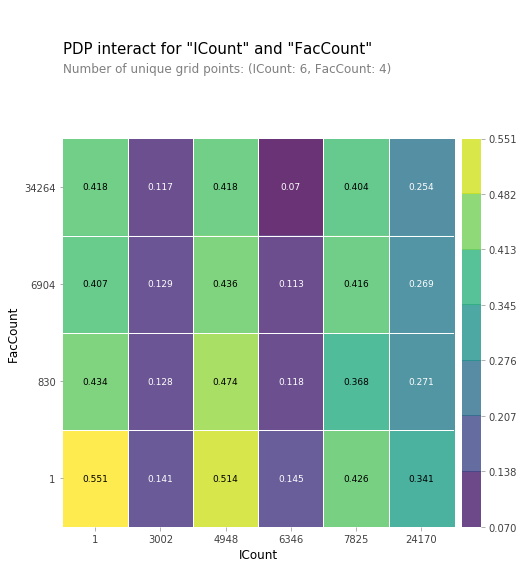

In [281]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['ICount', 'FacCount']

interaction = pdp_interact(
    model=best, 
    dataset=X_test, 
    model_features=X_test.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [284]:
import shap
shap.initjs()

data_for_prediction = X_test[X_test.index==917]
explainer = shap.TreeExplainer(best)
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)